<a href="https://colab.research.google.com/github/karthikprasannamuralidharan/Scm/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [19]:
import pandas as pd
import numpy as np

In [20]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


dataset_name = 'chronic_kidney_disease.csv'

try:
    #import and load weather dataset into pandas dataframe
    ckd_df = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(ckd_df.shape))
    print('Total number of records in dataset = ' + str(ckd_df.shape[0]))
    print('Total number of attributes in dataset = ' + str(ckd_df.shape[1]))
    print('')
    
    
    ckd_df = ckd_df.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = ckd_df['class']
    
    feature_classes = ckd_df.iloc[:, 0:24]
    
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=10)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    print(target_class1)
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

     class
0        0
1        0
2        0
3        0
4        0
..     ...
395      1
396      1
397      1
398      1
399      1

[400 rows x 1 columns]


In [21]:
feature_classes.shape

(400, 24)

In [22]:
target_class1.shape

(400, 1)

### Splitting into train and test batches(features and labels; 80:20) 

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_classes, target_class1, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 24) (80, 24) (320, 1) (80, 1)


In [24]:
import numpy as np
import keras
from keras import models, layers, optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import Input
from keras.models import Sequential, Model


### Hyperparameter tuning:

In [25]:
batch_size = 256
n_epochs = 10
n_nodes = 16
nb_classes = 2
weight = 0.2
class_weight = {0: weight, 1: (1-weight)}
dropout = 0.1
lr = 0.01
n_basic_features = 24
n_features = n_basic_features
n_cnn_features = n_features

No. of filters and kernel size:
kernel size can go upto 24 features but recommended smaller size (4,8)

In [26]:
n_filters = 16
kernel_size_3 = 3

In [27]:
import numpy as np
import random as rn
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import np_utils

### Standard scaler normalization:
Mean = 0 and standard deviation =1

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [29]:
n_cnn_features = 24
X_train_cnn = X_train
X_test_cnn = X_test
print(X_train.shape,X_test.shape)

(320, 24) (80, 24)


Converting numpy arrays(feature set) into tensors for cnn operation:

In [30]:
X_train_cnn = X_train_cnn.reshape((X_train.shape[0],n_cnn_features,1))
X_test_cnn  = X_test_cnn.reshape((X_test.shape[0],n_cnn_features,1))

In [31]:
print(X_train_cnn.shape,X_test_cnn.shape)

(320, 24, 1) (80, 24, 1)


One-hot encoding for neural nets:

In [32]:
nb_classes = 2
Y_train_cat = np_utils.to_categorical(y_train, nb_classes)
Y_test_cat = np_utils.to_categorical(y_test, nb_classes)
print(Y_train_cat.shape,Y_test_cat.shape)

(320, 2) (80, 2)


Input layer (first layer) of CNN:

In [33]:
inp_cnn   = Input(shape=(n_cnn_features,1))

Model creation:
adam is a popularly used optimizer which defines the learning rate (lr=0.01). Decides the step size of gradient descent optimization algorithm.

convolution layer is 1D here since features are 1 dimensional, the input shape is defined as a tensor, padding enabled if not 'same' then you can also use 'valid'.

activation function can be tanh, sigmoid, relu, leakyrelu.
Here we are using relu for all layers and softmax for the output layer.

Dropout layer is added to remove the redundancy.

Flatten layer is used to bring the reshaped features in CNN layer back to normal shape.

Dense layer is a fully connected layer which is added after cnn layers.

Batch normalization is a normalization techniques followed in CNN (for mean = 0 and SD =1).

Loss function chosen here is categorical_crossentropy.

In [34]:
adam = tf.keras.optimizers.Adam(lr=lr)
activation = 'relu'

#Two convolution layers
d_1 = layers.Conv1D(n_filters, kernel_size_3, input_shape=(n_cnn_features,1), padding='same', activation='relu', name='layer_1')(inp_cnn)
d_2 = layers.Dropout(dropout)(d_1)
d_3 = layers.Conv1D(n_filters, kernel_size_3, padding='same', activation='relu', name='layer_2')(d_2)
d_4 = layers.Dropout(dropout)(d_3)

#Flattening operation
d_5 = layers.Flatten()(d_4)

#Fully connected layer 1
d_6 = layers.Dense(n_nodes, name='layer_3')(d_5)
d_7 = layers.BatchNormalization()(d_6)
d_8 = layers.Dropout(dropout)(d_7)
d_9 = layers.Activation(activation='relu')(d_8)

#Output layer(softmax function)
d_10 = layers.Dense(2, activation='softmax')(d_9)

#Model definition:
model_cnn_3 = Model(inp_cnn, d_10)
model_cnn_3.summary()
model_cnn_3.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24, 1)]           0         
                                                                 
 layer_1 (Conv1D)            (None, 24, 16)            64        
                                                                 
 dropout_3 (Dropout)         (None, 24, 16)            0         
                                                                 
 layer_2 (Conv1D)            (None, 24, 16)            784       
                                                                 
 dropout_4 (Dropout)         (None, 24, 16)            0         
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 layer_3 (Dense)             (None, 16)                6160

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Learning process:

In [35]:
history = model_cnn_3.fit(X_train_cnn, Y_train_cat, batch_size=batch_size,
                          epochs=n_epochs, class_weight=class_weight,
                          validation_data=(X_test_cnn, Y_test_cat)) 

Epoch 1/10
2/2 [==============================] - 1s 214ms/step - loss: 0.2762 - accuracy: 0.5000 - val_loss: 0.3454 - val_accuracy: 0.9875
Epoch 2/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0777 - accuracy: 0.8500 - val_loss: 0.2205 - val_accuracy: 0.9875
Epoch 3/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0608 - accuracy: 0.8969 - val_loss: 0.1557 - val_accuracy: 0.9875
Epoch 4/10
2/2 [==============================] - 0s 28ms/step - loss: 0.0560 - accuracy: 0.9281 - val_loss: 0.1166 - val_accuracy: 0.9875
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 0.0498 - accuracy: 0.9344 - val_loss: 0.0908 - val_accuracy: 0.9875
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0399 - accuracy: 0.9688 - val_loss: 0.0729 - val_accuracy: 0.9875
Epoch 7/10
2/2 [==============================] - 0s 28ms/step - loss: 0.0378 - accuracy: 0.9500 - val_loss: 0.0608 - val_accuracy: 0.9875
Epoch 8/10
2/2 [==========

Predicted labels and actual labels compared for plotting confusion matrix

3/3 [==============================] - 0s 5ms/step

Precision: 0.9642857142857143
Accuracy: 0.975
Recall: 0.9642857142857143
F1-score: 0.9642857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Confusion Matrix: 
[[51  1]
 [ 1 27]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


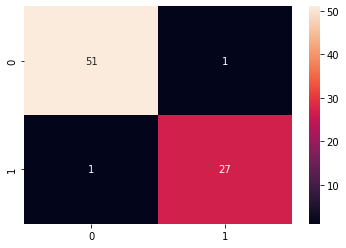

In [36]:
pred = model_cnn_3.predict([X_test_cnn], verbose=1)
Y_pred = np.reshape(np.argmax(pred, axis=1), newshape=(pred.shape[0],1)) 
Y_test_ = np.asarray(np.reshape(y_test, newshape=(y_test.shape[0],1)), dtype=np.int)

print('\nPrecision: ' + str(metrics.precision_score(y_test, Y_pred)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, Y_pred)))
print('Recall: ' + str(metrics.recall_score(y_test, Y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, Y_pred)))


print('\nClassification Report:\n' + str(metrics.classification_report(y_test, Y_pred)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, Y_pred)))
sns.heatmap(metrics.confusion_matrix(y_test, Y_pred), annot = True)
plt.show()